# Electrical characteristic analysis of sample CA12X2_C1

In [57]:
paths = ['../CA12X2_C1/CA12X2_C1_current_from_0.5e-6_to_1e-6A/CA12X2_C1_current_from_0.5e-6_to_1e-6A-20220428154754',
        '../CA12X2_C1/CA12X2_C1_current_from_1e-7_to_1e-6A/CA12X2_C1_current_from_1e-7_to_1e-6A-20220428162518']

#Select the experiment from list of the paths, eg. paths[0] picks the first experiment, paths[1] the second one and so on 
data_path = paths[0]

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection.
Name of the sample: CA12X2_C1
Area: 5.908e-2cm2
Length: 0.583e-1cm
Current source from 0.5e-6A to 1e-6A

### Experiment 20220428154754 ###
Date 2022-04-28 start at 15:36:28 end at 15:47:28 duration 0:11:00
Temperature range from 102.40°K to 98.30°K
Resistivity:
	 average 1.0295e+07𝛀 cm
	 minimum 7.3922e+06𝛀 cm at 102.35°K
	 maximum 2.2656e+07𝛀 cm at 102.40°K
Voltage:
	 average 7.2425e+00V
	 minimum 3.8135e+00V at 101.32°K
	 maximum 1.1953e+01V at 102.36°K


<img style="float:left" src="../CA12X2_C1/CA12X2_C1_Info/ca12x2_c1_deposizione_argento.jpeg" width=300 />
<img src="../CA12X2_C1/CA12X2_C1_Info/ca12x2_c1-montaggio_20220428.jpeg" width=300 />

## Annotation

Il campione presenta inclusioni di rutenio metallico rilevate al microscopio ottico, non è stata fatta un'analisi diffrattometrica ai raggi X. Per il collegamento elettrico sono state create due piazzole conduttive depositando su entrambe le facce Ag con il metodo della polverizzazione catodica per la durata di 4 minuti, con Argon alla pressione di lavoro di 8 10-2 torr e voltaggio di 1,9kV. Per delineare le piazzole è stato usato sperimentalmente un foglio di paraffina, PARAFILM. I contatti sono stati realizzati con una diversa pasta d'argento.
Resistenza iniziale è di circa 40 Ohm a temperatura ambiente, resistenza misurata allo smontaggio dal discendente è di circa 49.6 Ohm a temperatura ambiente. Il campione allo smontaggio risulta integro.

## Loading experiment data

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

In [59]:
data = np.load(data_path + '.npz', allow_pickle=True)
datetime_data = data['datetime']
voltage_data = data['voltage']
resistance_data = data['resistance']
temperature_data = data['temperature']
source_data = data['current_source']
c_density_data = data['current_density']
e_field_data = data['electric_field']
resistivity_data = data['resistivity']
thickness = voltage_data/e_field_data
area = source_data/c_density_data
# Density in mA/cm2
c_density_data = c_density_data * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [60]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 5.9080e-02cm2
Thickness:5.8300e-02cm


### Temperature

In [61]:
temp_msg = ""
temp_const = True
diff = np.max(temperature_data) - np.min(temperature_data)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {temperature_data[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(temperature_data):.2f}°K difference between min and max {np.max(temperature_data) - np.min(temperature_data):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(temperature_data):.2f}°K to {np.max(temperature_data):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature span from 98.30°K to 102.40°K


### Input source

In [62]:
source_msg = ""
source_const = True
if source_data[0] == source_data[-1]: 
    source_msg = f"Source is constant: {source_data[0]:.2e}A ({c_density_data[0]:.2e}mA/cm2)"
else:
    source_msg = f"Source span from {np.min(source_data):.2e}A ({np.min(c_density_data):.2e}mA/cm2) to {np.max(source_data):.2e}A ({np.max(c_density_data):.2e}mA/cm2)"
    source_const = False
print(source_msg)

Source span from 5.00e-07A (8.46e-03mA/cm2) to 1.00e-06A (1.69e-02mA/cm2)


In [63]:
DT = datetime_data[0:-1]
T = temperature_data[0:-1]
J = c_density_data[0:-1]
RHO = resistivity_data[0:-1]
E = e_field_data[0:-1]

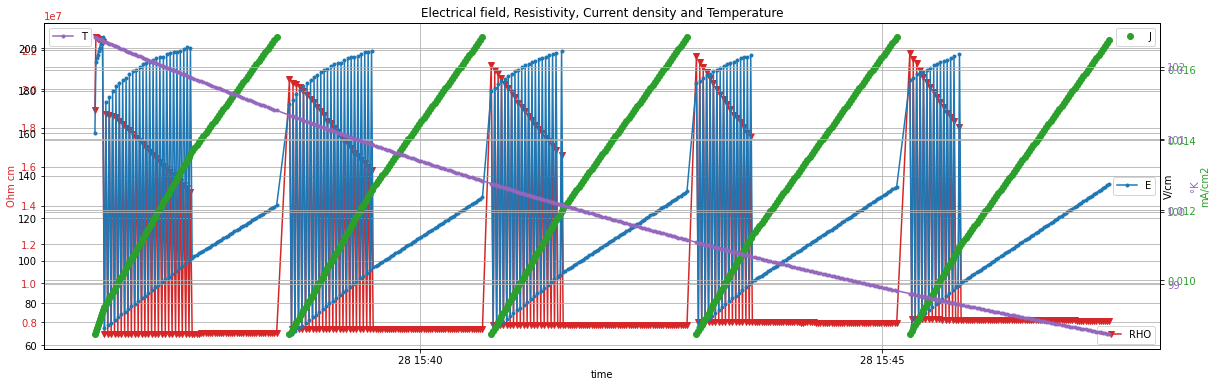

In [64]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity, Current density and Temperature")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()
ax4 = ax2.twinx()
if not temp_const:
    ax4.set_ylabel('°K', color='C4')
    ax4.tick_params(axis='y', labelcolor='C4')
    ax4.plot(DT, T, '.-', label='T', color='C4')
    ax4.legend(loc='upper left')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

## Slices

In [65]:
slices, = np.where(source_data == np.min(source_data))
for i in range(0,len(slices)-1):
    print(f"Slice {i+1} from {slices[i]} to {slices[i+1]}")
print(f"Slice {len(slices)} from {slices[-1]} to {len(source_data)}")

Slice 1 from 0 to 100
Slice 2 from 100 to 200
Slice 3 from 200 to 300
Slice 4 from 300 to 400
Slice 5 from 400 to 500


## Analysis of the 1st slice

In [66]:
DT = datetime_data[slices[0]:slices[1]]
T = temperature_data[slices[0]:slices[1]]
J = c_density_data[slices[0]:slices[1]]
RHO = resistivity_data[slices[0]:slices[1]]
E = e_field_data[slices[0]:slices[1]]

In [67]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 101.94°K difference between min and max 1.01°K


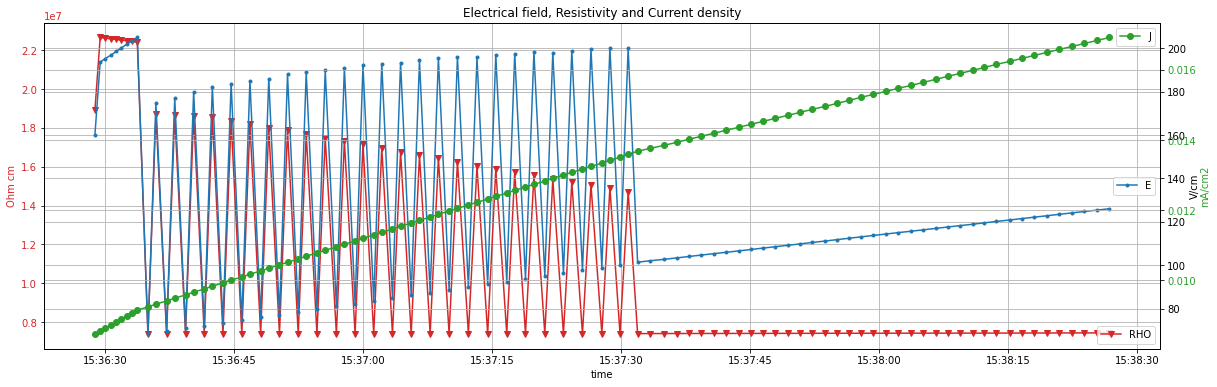

In [68]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

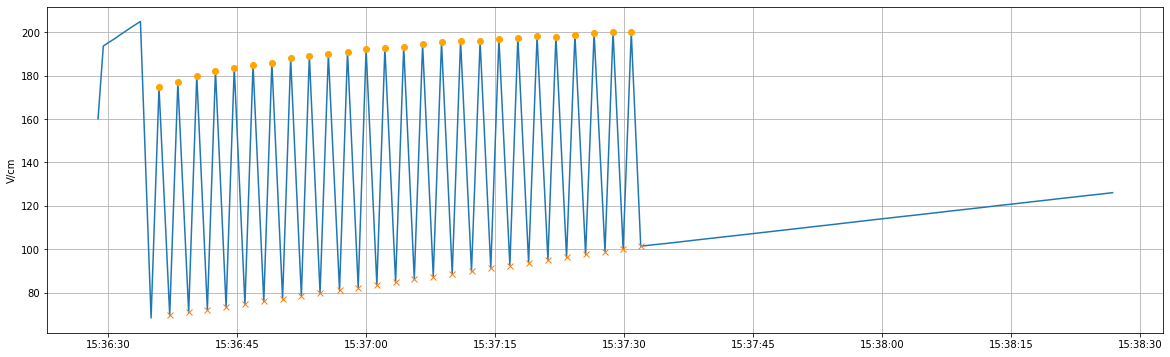

In [69]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [70]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 174.6 V/cm, 1.873e+07 Ohm cm at T:102.34°K and J:9.318e-03 mA/cm2
Last peak  with value 199.9 V/cm, 1.47e+07 Ohm cm at T:101.86°K and J:1.359e-02 mA/cm2


#### Peaks amplitude

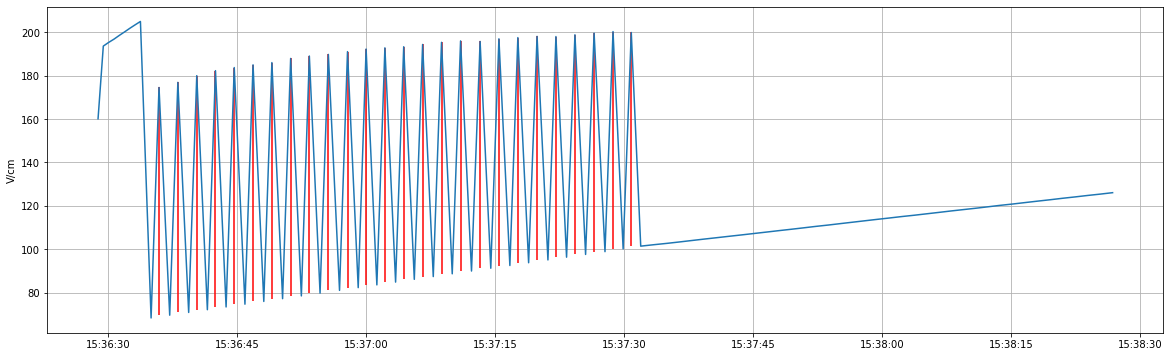

In [71]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [72]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 98.6 V/cm at T:102.19°K and J:1.060e-02 mA/cm2      
Maximum amplitude 109.5 at V/cm at T:102.37°K and J:9.062e-03 mA/cm2      
Average amplitude 106.0 V/cm


#### Time interval between peaks [ms]

Average 2196 milliseconds


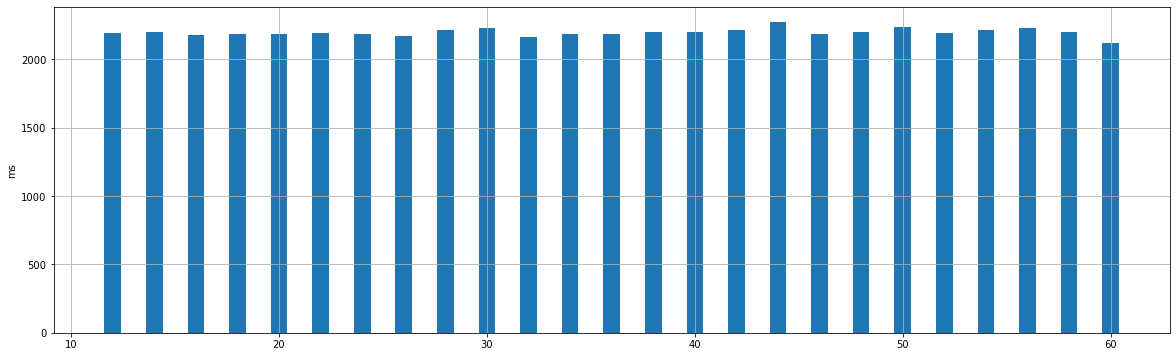

In [73]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 2nd slice

In [74]:
DT = datetime_data[slices[1]:slices[2]]
T = temperature_data[slices[1]:slices[2]]
J = c_density_data[slices[1]:slices[2]]
RHO = resistivity_data[slices[1]:slices[2]]
E = e_field_data[slices[1]:slices[2]]

In [75]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 100.89°K difference between min and max 0.91°K


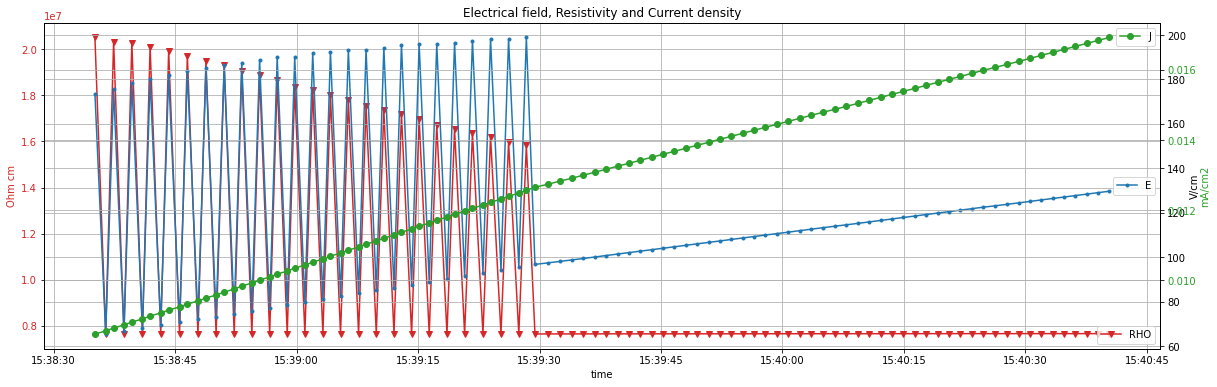

In [76]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

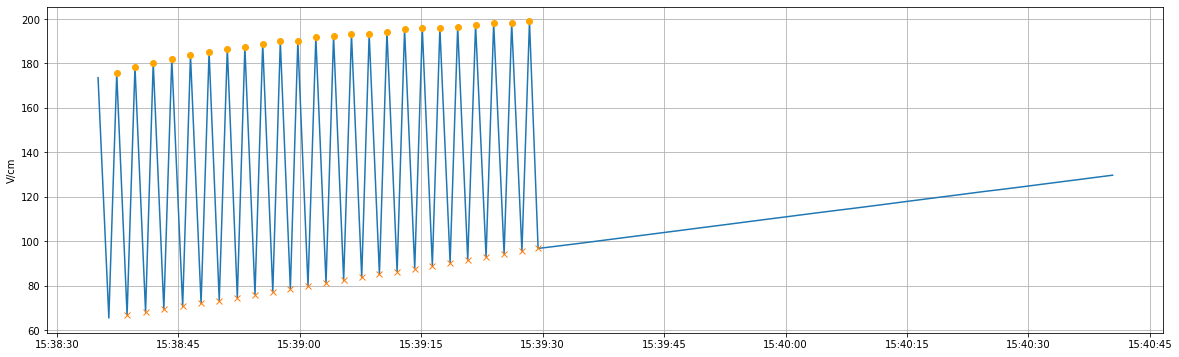

In [77]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [78]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 175.5 V/cm, 2.032e+07 Ohm cm at T:101.31°K and J:8.634e-03 mA/cm2
Last peak  with value 198.9 V/cm, 1.58e+07 Ohm cm at T:100.93°K and J:1.257e-02 mA/cm2


#### Peaks amplitude

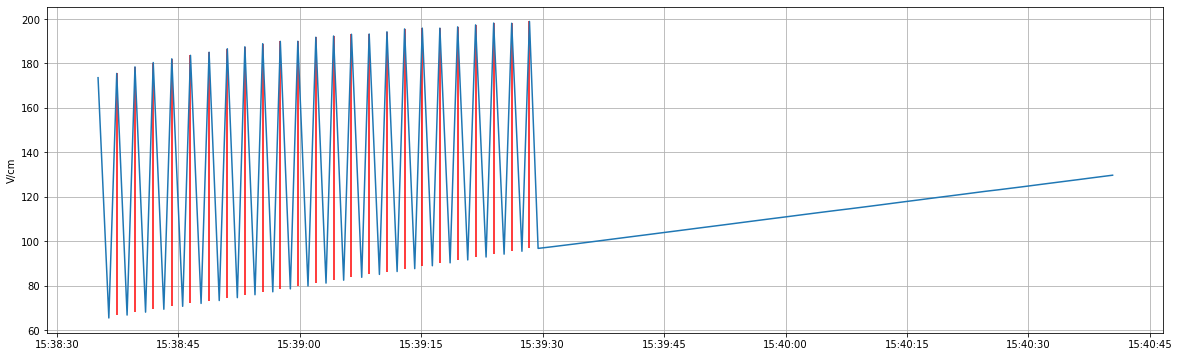

In [79]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [80]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 102.1 V/cm at T:101.13°K and J:1.043e-02 mA/cm2      
Maximum amplitude 112.0 at V/cm at T:101.28°K and J:8.976e-03 mA/cm2      
Average amplitude 108.6 V/cm


#### Time interval between peaks [ms]

Average 2216 milliseconds


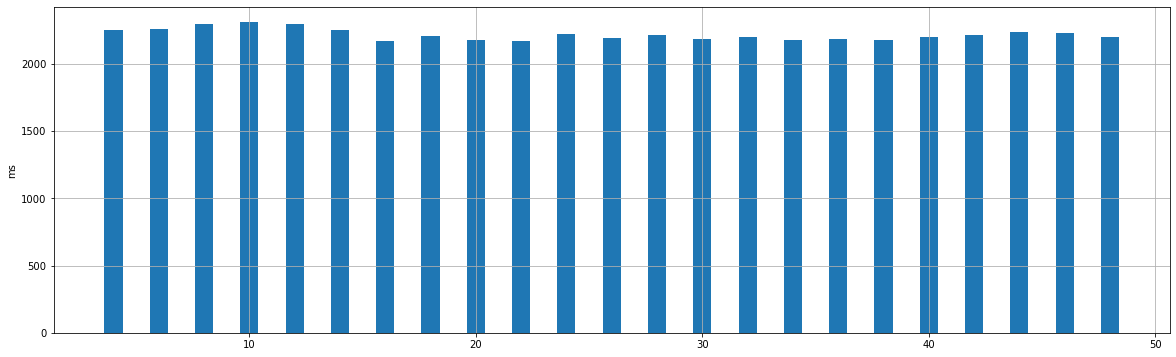

In [81]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 3rd slice

In [82]:
DT = datetime_data[slices[2]:slices[3]]
T = temperature_data[slices[2]:slices[3]]
J = c_density_data[slices[2]:slices[3]]
RHO = resistivity_data[slices[2]:slices[3]]
E = e_field_data[slices[2]:slices[3]]

In [83]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 100.01°K difference between min and max 0.78°K


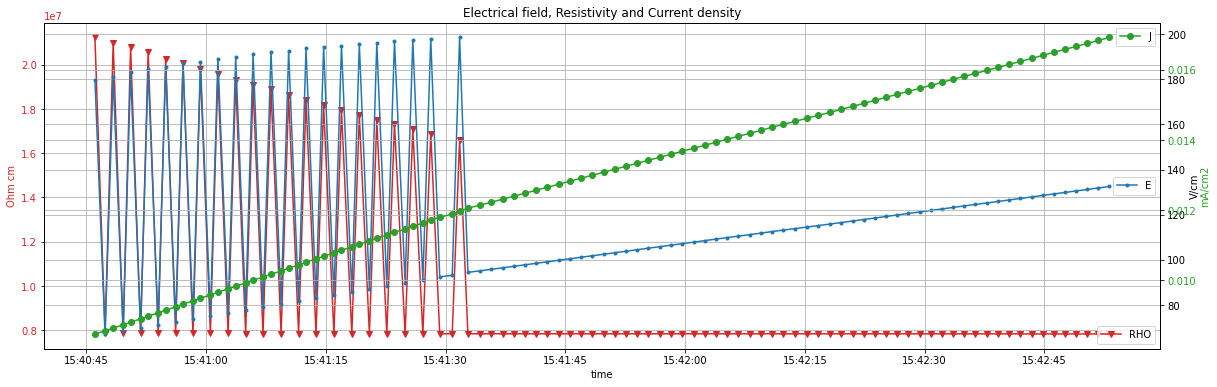

In [84]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

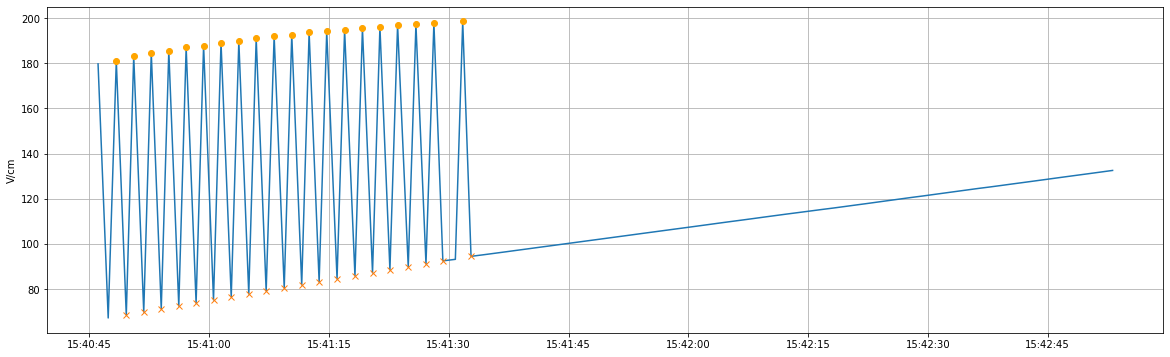

In [85]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [86]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 181.1 V/cm, 2.097e+07 Ohm cm at T:100.37°K and J:8.634e-03 mA/cm2
Last peak  with value 198.5 V/cm, 1.66e+07 Ohm cm at T:100.09°K and J:1.197e-02 mA/cm2


#### Peaks amplitude

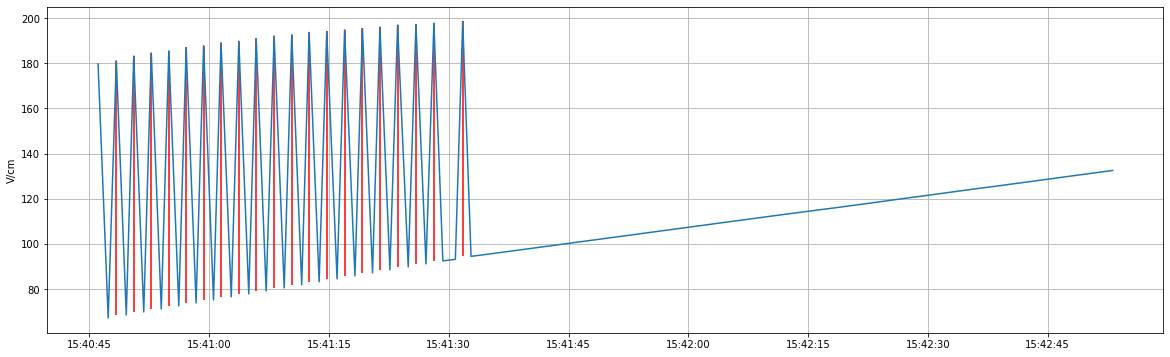

In [87]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [88]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 104.0 V/cm at T:100.25°K and J:1.009e-02 mA/cm2      
Maximum amplitude 113.4 at V/cm at T:100.37°K and J:8.634e-03 mA/cm2      
Average amplitude 110.2 V/cm


#### Time interval between peaks [ms]

Average 2283 milliseconds


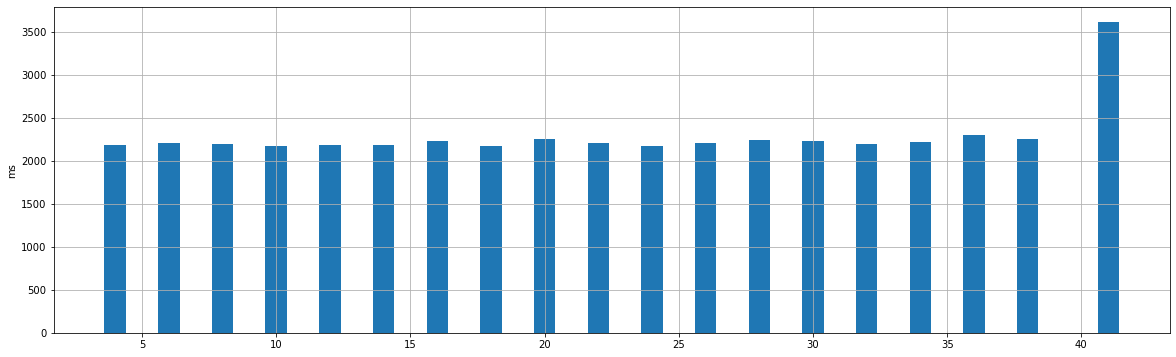

In [89]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 4th slice

In [90]:
DT = datetime_data[slices[3]:slices[4]]
T = temperature_data[slices[3]:slices[4]]
J = c_density_data[slices[3]:slices[4]]
RHO = resistivity_data[slices[3]:slices[4]]
E = e_field_data[slices[3]:slices[4]]

In [91]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 99.25°K difference between min and max 0.67°K


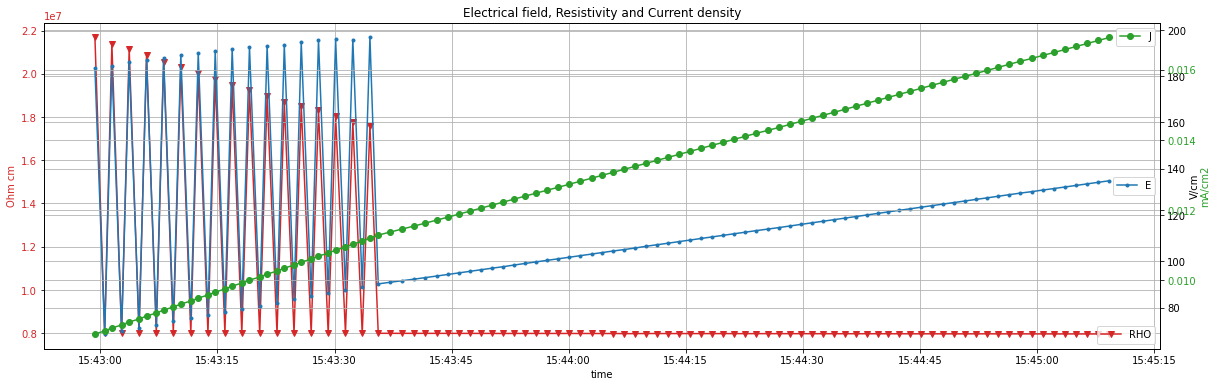

In [92]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

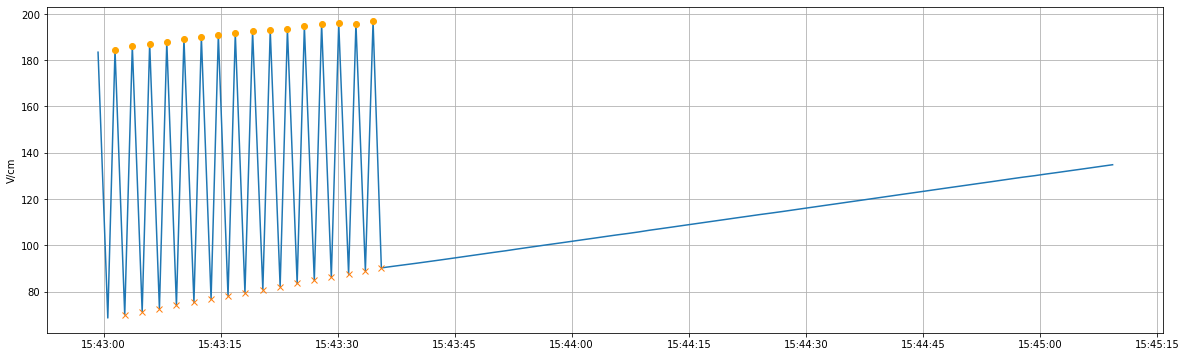

In [93]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [94]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 184.5 V/cm, 2.137e+07 Ohm cm at T:99.56°K and J:8.634e-03 mA/cm2
Last peak  with value 196.8 V/cm, 1.76e+07 Ohm cm at T:99.38°K and J:1.120e-02 mA/cm2


#### Peaks amplitude

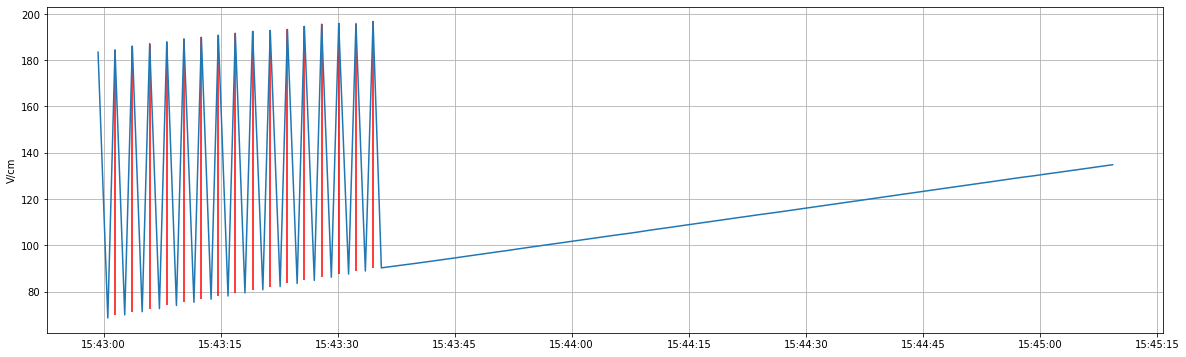

In [95]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [96]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 106.5 V/cm at T:99.48°K and J:9.745e-03 mA/cm2      
Maximum amplitude 114.8 at V/cm at T:99.57°K and J:8.549e-03 mA/cm2      
Average amplitude 111.5 V/cm


#### Time interval between peaks [ms]

Average 2204 milliseconds


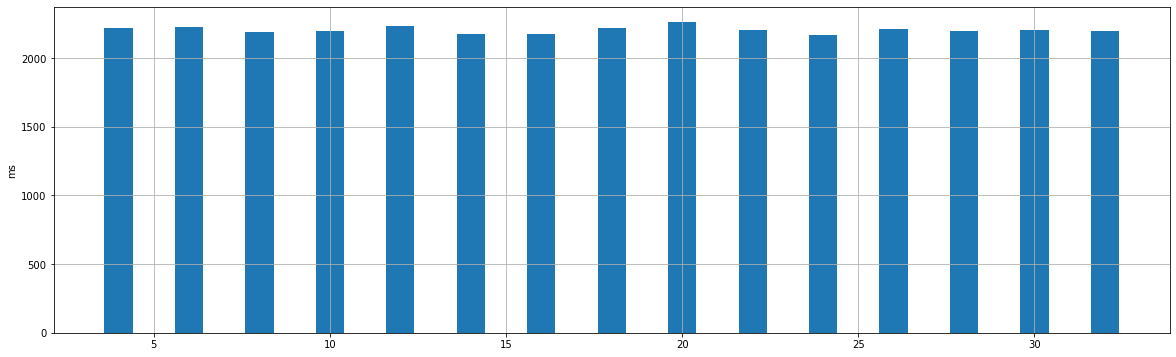

In [97]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the last slice

In [98]:
DT = datetime_data[slices[-1]:-1]
T = temperature_data[slices[-1]:-1]
J = c_density_data[slices[-1]:-1]
RHO = resistivity_data[slices[-1]:-1]
E = e_field_data[slices[-1]:-1]

In [99]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 98.59°K difference between min and max 0.56°K


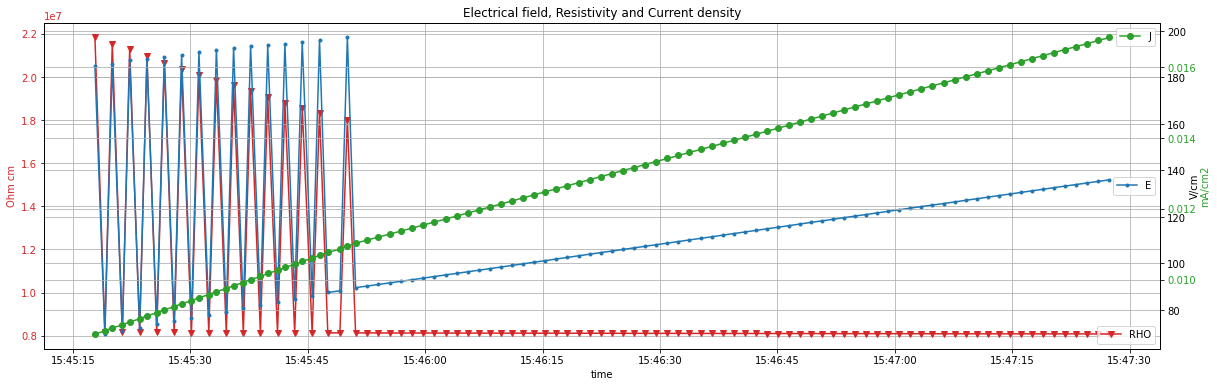

In [100]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

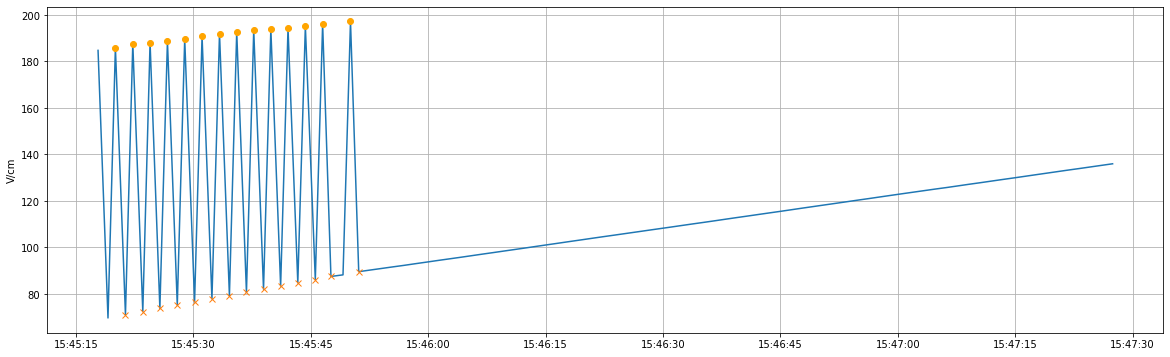

In [101]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [102]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 186.0 V/cm, 2.154e+07 Ohm cm at T:98.86°K and J:8.634e-03 mA/cm2
Last peak  with value 197.2 V/cm, 1.80e+07 Ohm cm at T:98.72°K and J:1.094e-02 mA/cm2


#### Peaks amplitude

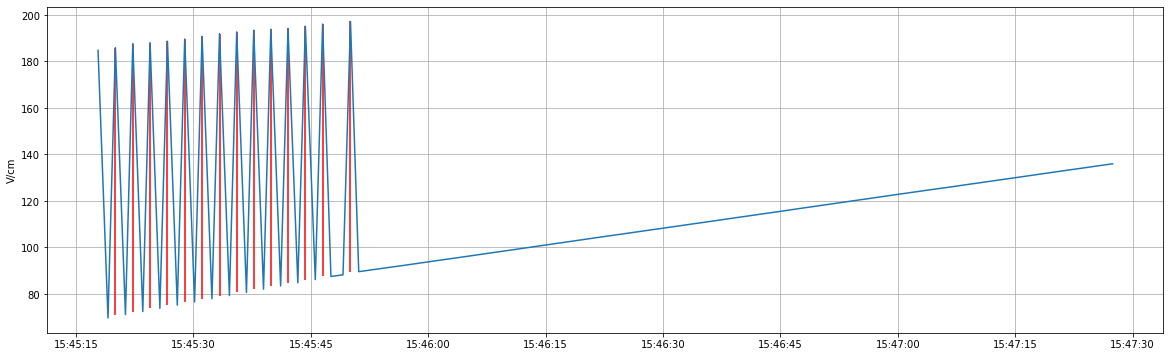

In [103]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [104]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 107.6 V/cm at T:98.80°K and J:9.574e-03 mA/cm2      
Maximum amplitude 115.2 at V/cm at T:98.86°K and J:8.549e-03 mA/cm2      
Average amplitude 111.8 V/cm


#### Time interval between peaks [ms]

Average 2310 milliseconds


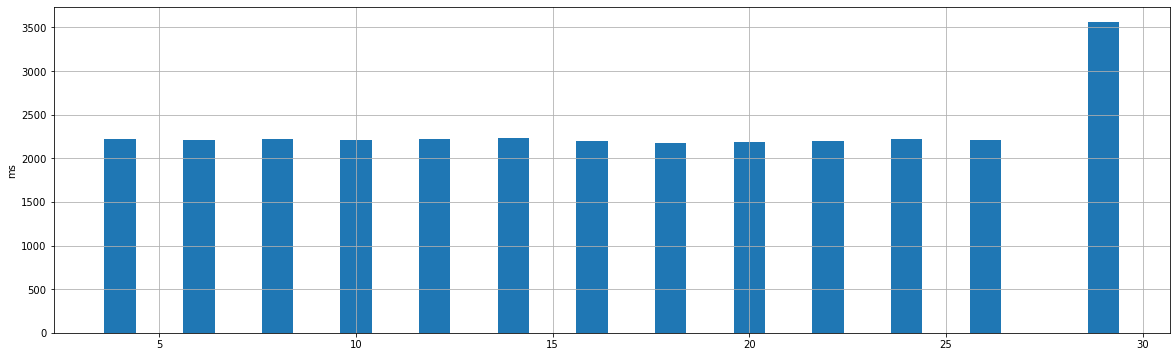

In [105]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")